In [1]:
# Bibliotecas necessárias:

import random
import matplotlib.pyplot as plt

In [2]:
doors = [1, 2, 3]

In [3]:
# Função que determina se o participante ganhou o prêmio ou não:

def win(change_door, print_game=False):

  right_door = random.choice(doors) # Porta com o prêmio
  picked_door = random.choice(doors) # Porta escolhida pelo participante

  remaing_doors = [door for door in doors if door != picked_door] # Portas não escolhidas
  two_final_doors = {'picked_door': picked_door}

  if right_door == picked_door: # Se o participante for sortudo e escolher a porta correta

    opened_door = random.choice(remaing_doors) # Qualquer uma das portas não escolhidas será aberta (aleatório)
    remaining_door = [door for door in remaing_doors if door != opened_door][0] # Porta não aberta - e sem o prêmio
    two_final_doors['other_door'] = remaining_door

  else: # Se o participante escolher uma das portas sem o prêmio
    two_final_doors['other_door'] = right_door # Será aberta a outra porta sem o prêmio e ficará isponível para a escolha final a porta com o prêmio

  final_door_picked = two_final_doors['other_door'] if change_door else two_final_doors['picked_door'] # Escolha final da porta, a depender da decisão de trocar ou não
  result = True if final_door_picked == right_door else False # Resultado

  if print_game:
    print(f'Porta Escolhida: {picked_door}')
    print(f'Porta Correta: {right_door}')
    print(f'Porta Final: {final_door_picked}')
    print('Parabéns!!! Você ganhoooooou :D \n') if result else print('você perdeu... :( \n')

  return result

In [4]:
# # # Testando a Função:

print('Mudando a porta:')
win(True, print_game=True)

print('Mantendo a porta:')
win(False, print_game=True)

Mudando a porta:
Porta Escolhida: 1
Porta Correta: 1
Porta Final: 2
você perdeu... :( 

Mantendo a porta:
Porta Escolhida: 1
Porta Correta: 2
Porta Final: 1
você perdeu... :( 



False

In [5]:
# Função para simular a situação n vezes:

def simulation(change_door, n=1000000):
  return [win(change_door) for i in range(0, n)]

In [6]:
# Simulação: TROCANDO A PORTA
results_changing_door = simulation(True)

# Simulação: NÃO TROCANDO A PORTA
results_not_changing_door = simulation(False)

In [7]:
# Comparando os resultados:

# Simulação: TROCANDO A PORTA
results_changing_door_1 = sum(results_changing_door)/len(results_changing_door)
print(f'Probabilidade de vitória TROCANDO A PORTA: {round(results_changing_door_1*100,2)}%')

# Simulação: NÃO TROCANDO A PORTA
results_not_changing_door_1 = sum(results_not_changing_door)/len(results_not_changing_door)
print(f'Probabilidade de vitória NÃO TROCANDO A PORTA: {round(results_not_changing_door_1*100,2)}%')

Probabilidade de vitória TROCANDO A PORTA: 66.65%
Probabilidade de vitória NÃO TROCANDO A PORTA: 33.29%


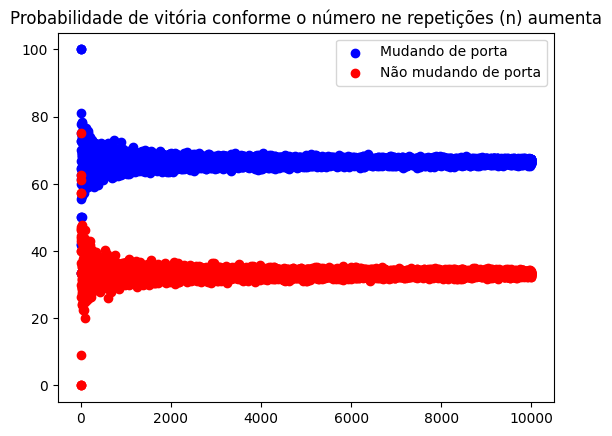

In [14]:
# Lei dos Grandes Números na Prática

n = 10000
list_prob_true = []
list_prob_false = []

for i in range(0, n):

  results_changing_door = simulation(True, n=i+1)
  list_prob_true.append(round((sum(results_changing_door)/len(results_changing_door))*100,2))

  results_not_changing_door = simulation(False, n=i+1)
  list_prob_false.append(round((sum(results_not_changing_door)/len(results_not_changing_door))*100,2))

plt.title('Probabilidade de vitória conforme o número ne repetições (n) aumenta')
plt.scatter(range(0, n), list_prob_true, label='Mudando de porta', color='blue')
plt.scatter(range(0, n), list_prob_false, label='Não mudando de porta', color='red')
plt.legend()

plt.show()

Resumo: se você alguma vez se deparar com um problema semelhante, mudar de porta talvez possa ser mais vantajoso...
---

